This is a basic Regression based solution to the problem.

In [25]:
%matplotlib inline
import numpy as np # logistic regression
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

df = pd.read_csv('1_data/mushrooms.csv')
print(df.columns)
display(df.head())
display(df.tail())
#df['date'] = pd.to_datetime(df['date'])
#df['date'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
#print(df.head())

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


まずはクラスの数を確認する

In [22]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

C:\Users\ytamura\AppData\Local\conda\conda\envs\skillupAI\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


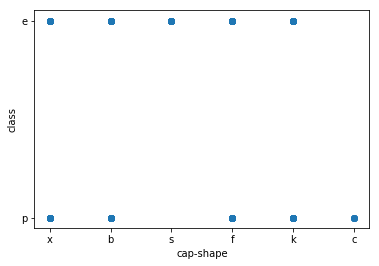

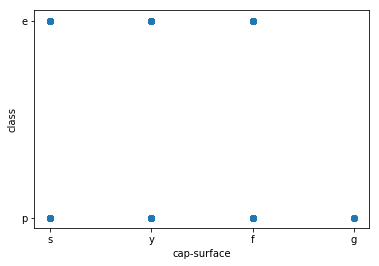

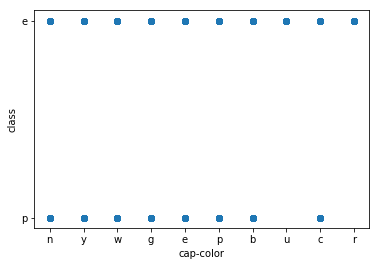

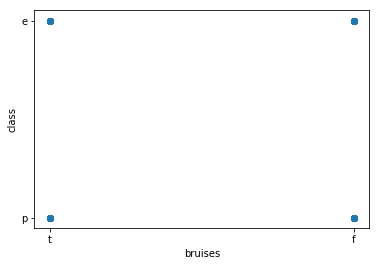

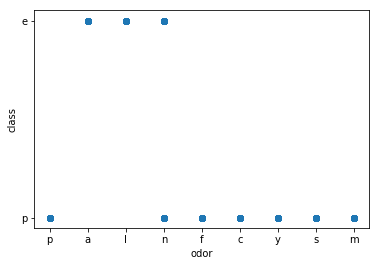

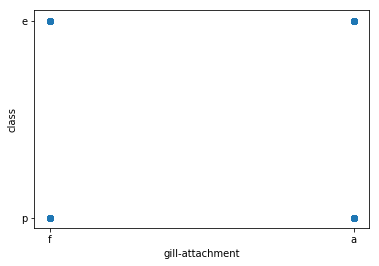

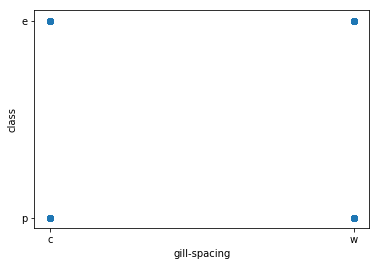

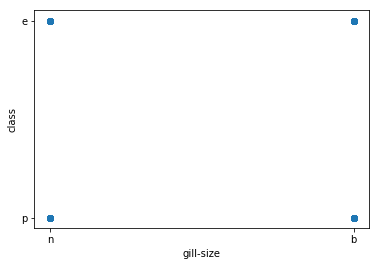

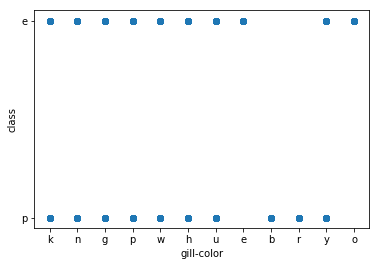

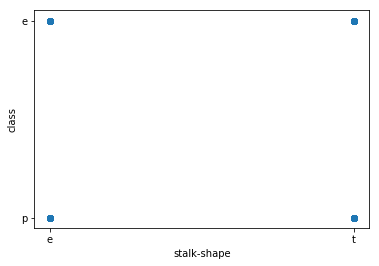

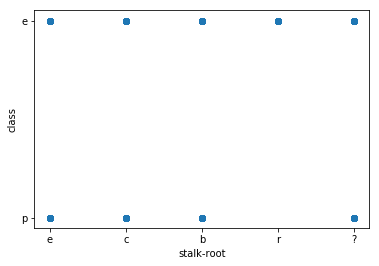

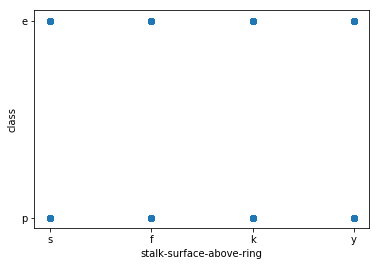

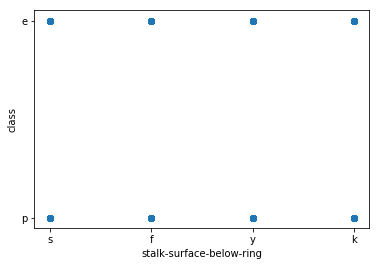

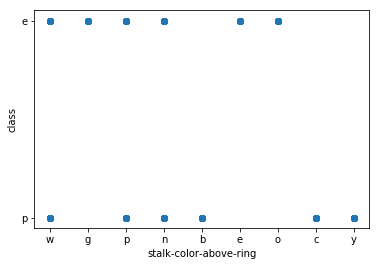

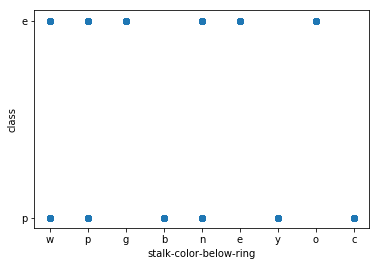

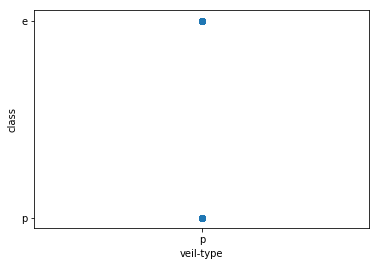

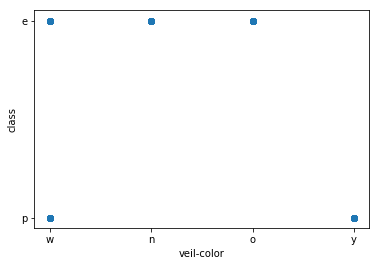

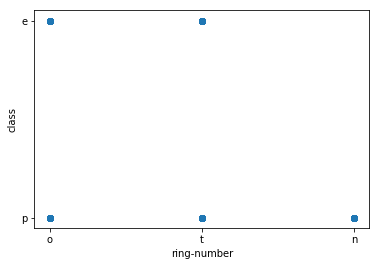

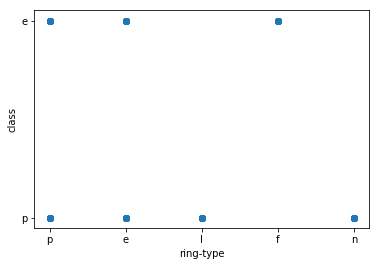

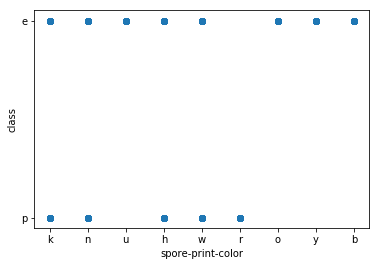

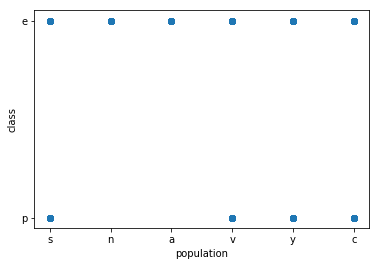

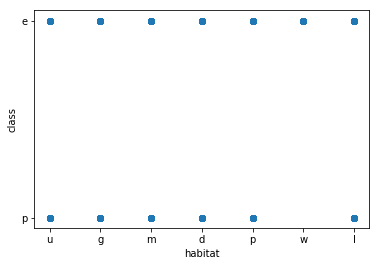

In [23]:
#この可視化以外にも授業で習ったことをやってください

#labels = ['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
labels = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
y = 'class'
for i in range(len(labels)):
    plt.figure()
    plt.scatter(df[labels[i]], df[y])
    plt.xlabel(labels[i])
    plt.ylabel(y)

ラベルを数値データに変換する。  
(やり方はネットのコピペです)

In [26]:
df_int = pd.DataFrame()
le = LabelEncoder()
for col in df.columns:
    df_int[col] = le.fit_transform( df[col])
df_int.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [30]:
# トレインテスト分割を授業で習った方法でやってください。
train = df_int[:4000]
test = df_int[4000:-1]
y = train['class']
#y = np.where(tmp_y == "p", 0, 1)
y_test = test['class']
#y_test = np.where(tmp_y_test == "p", 0, 1)
train = train.drop('class', 1)
test = test.drop('class', 1)

In [31]:
#ロジスティック回帰で分類し、妥当性を評価する
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(train, y)
y_pred = lr.predict(test)

print(lr.coef_,lr.intercept_)
y_pred = lr.predict(test)

print(classification_report(y_test,y_pred))

[[ 0.24158587  0.88450376  0.04612205  1.76202584  0.50476359  1.56451049
  -0.52897631  7.82042763  0.06932977 -7.67215465 -2.68560582 -3.52641497
  -1.27870372 -0.11283349 -0.19515059  0.          3.12902098  1.22384241
  -0.40911308 -1.14023971  0.3003758  -0.25557198]] [1.56451049]
             precision    recall  f1-score   support

          0       0.38      0.79      0.52       898
          1       0.92      0.65      0.76      3225

avg / total       0.80      0.68      0.71      4123



精度としてはイマイチだが、6000個くらいのデータで学習すると過学習か？ってレベルで精度が上がる  
Class:1=p,0=e